In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D


In [2]:

DATA = "/Users/anton_grahed/Desktop/Macroeconomics/Quantitative Macro/datasets"
data = pd.read_excel(os.path.join(DATA, "mpd2020.xlsx"), sheet_name= 'Full data')

# how many countries are in 
len(data.country.unique())

# for each country: what years are available?
## manual method
cntry_years = []
for cntry in data.country.unique():
    cy_data = data[data.country == cntry]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    cntry_years.append((cntry, ymin, ymax))
# put in a dataframe
cntry_years = pd.DataFrame(cntry_years, columns=['country', 'min', 'max'])

cntry_years

,country,min,max
0,Afghanistan,1820,2018
1,Angola,1950,2018
2,Albania,1,2018
3,United Arab Emirates,1950,2018
4,Argentina,1800,2018
...,...,...,...
164,Yemen,1820,2018
165,Former Yugoslavia,1,2018
166,South Africa,1,2018
167,Zambia,1950,2018


In [3]:
## reshape data 
# 1. map between country-code and country

# whenever you filter: index will change 
# drop = True means that the index is reset
code_to_name = data[['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

# focus on GDP 
gdppc = data.set_index(['countrycode', 'year'])['gdppc']

# now we can unstack based on countrycode
gdppc = gdppc.unstack('countrycode')

gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


Text(0.5, 0, 'Year')

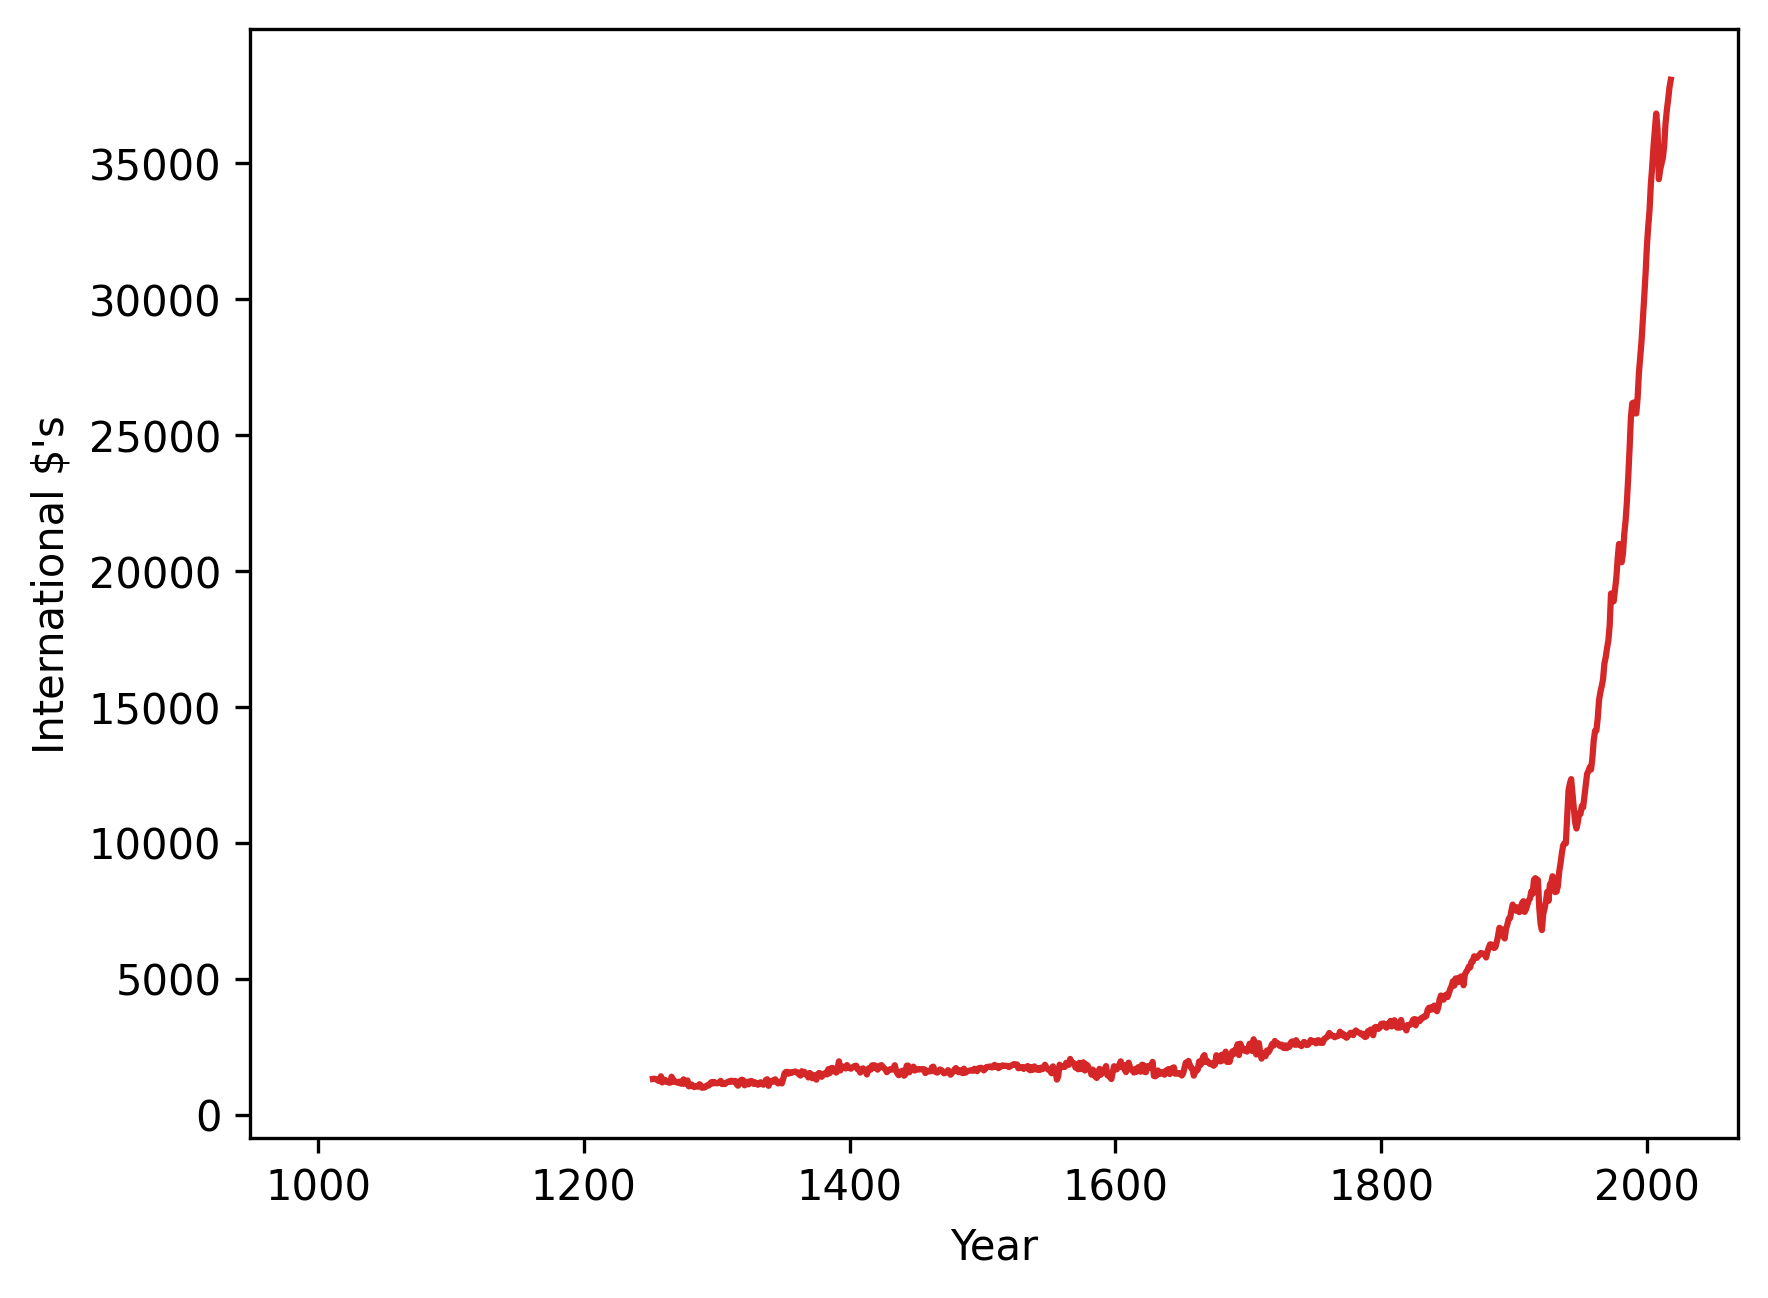

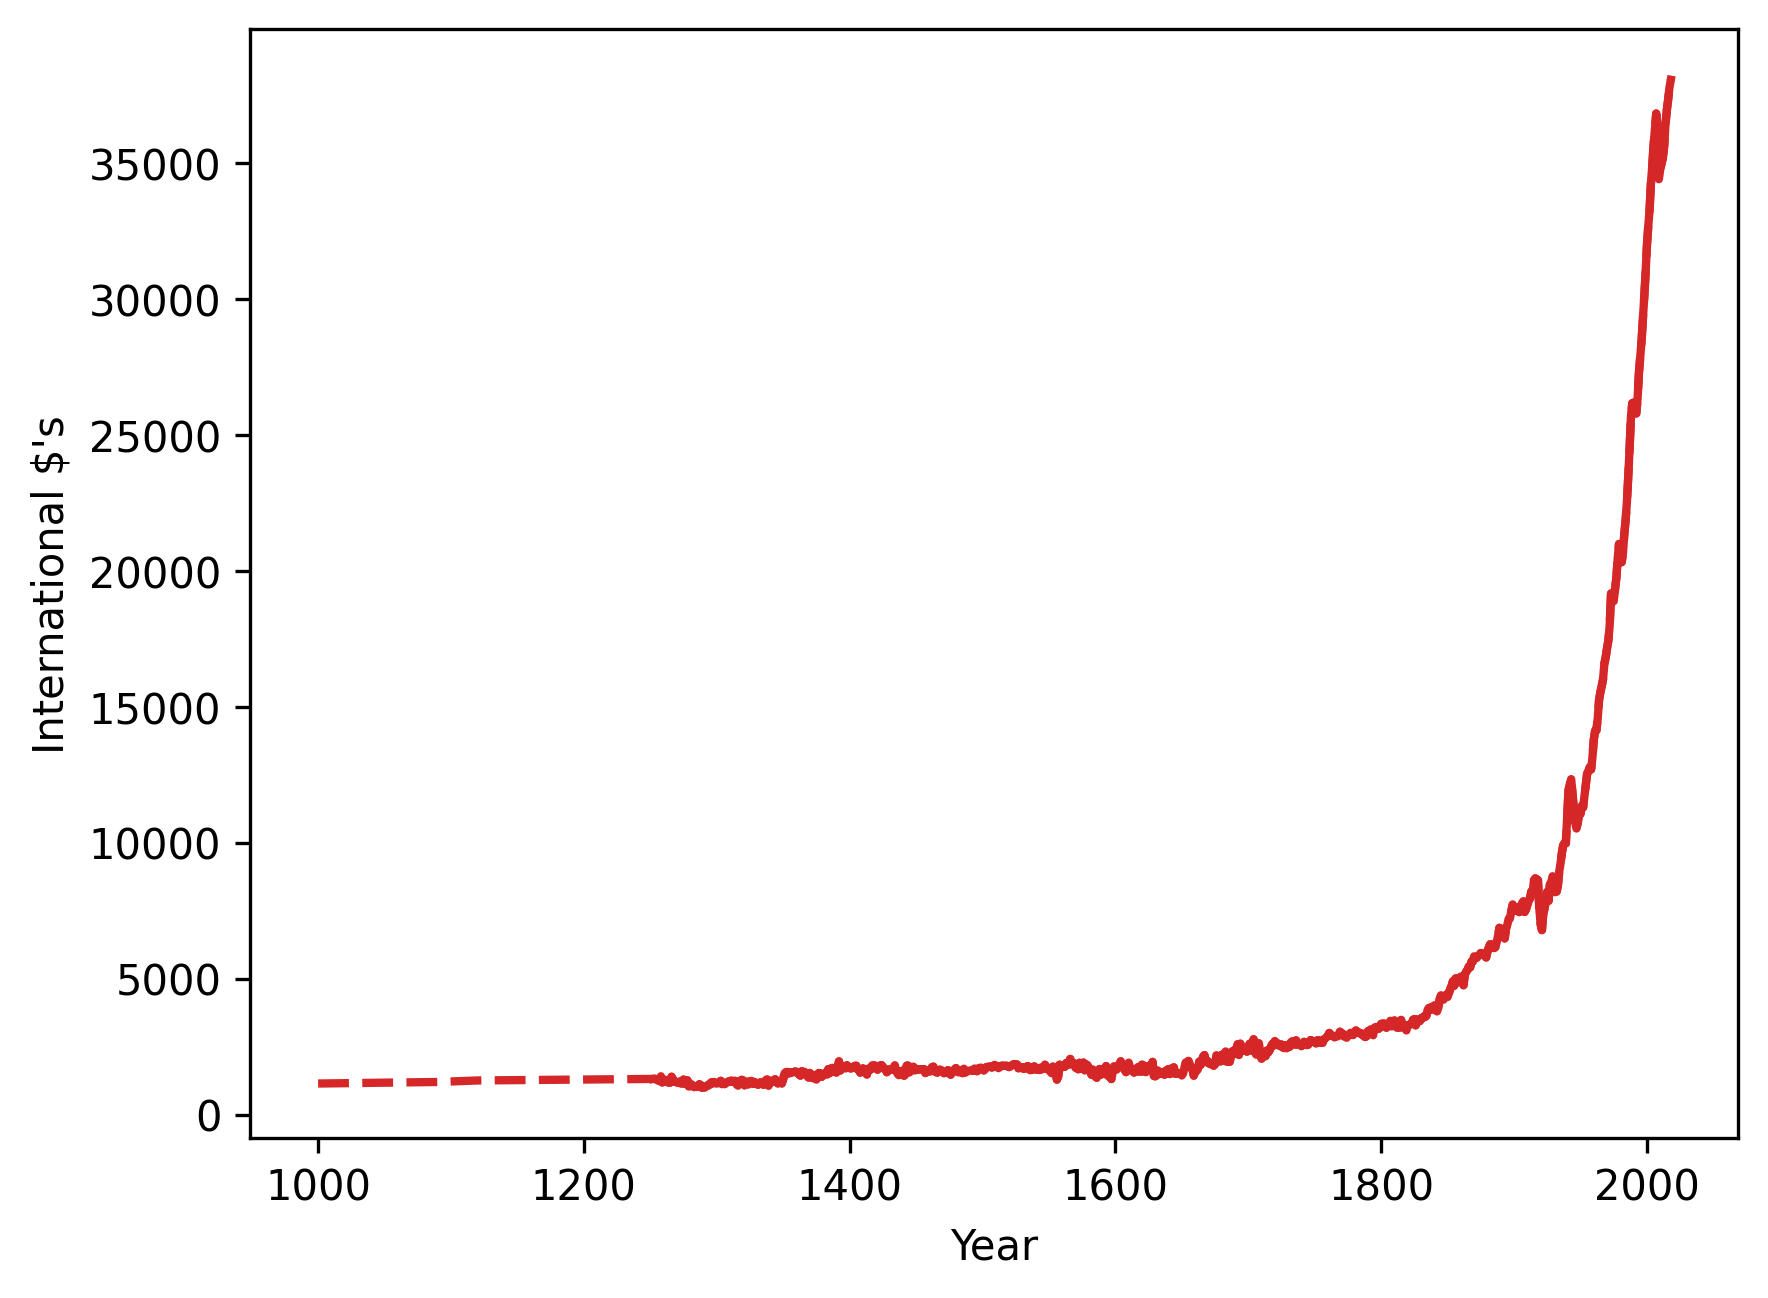

In [4]:

# create a colormap b/w country codes and colors for consistency
country_names = data['countrycode']

colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for country, color in zip(country_names, colors)}

## GPD FOR UK
fig, ax = plt.subplots(dpi=300)
cntry = "GBR"
_ = gdppc[cntry].plot(
    ax = fig.gca(), # get current axes
    ylabel = "International $\'s",
    xlabel = "Year",
    linestyle = "-",
    color = color_mapping[cntry]
)

# can interpolate to fill in gaps
fig, ax = plt.subplots(dpi=300)
cntry = "GBR"

# interpolated plot 
ax.plot(gdppc[cntry].interpolate(),
        linestyle = "--",
        color = color_mapping[cntry],
        lw = 2)

ax.plot(gdppc[cntry],
        linestyle = "-",
        color = color_mapping[cntry],
        lw = 2)
ax.set_ylabel("International $'s")
ax.set_xlabel("Year")
#plt.show()

In [5]:

## now make a function 
def draw_interp_plots(series, ylabel, xlabel, color_mapping, code_to_name, lw, logscale, ax):
    for i,c in enumerate(cntry):
        # get the interpolated data 
        df_interpolated = series[c].interpolate(limit_area = "inside")
        interpolated_data = df_interpolated[series[c].isnull()]

        # plot the interpolated data
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])
        
        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                linestyle='-',
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        # add option of logscale 
        if logscale == True: 
            ax.set_yscale('log')

    # draw legend outside plot 
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    return ax



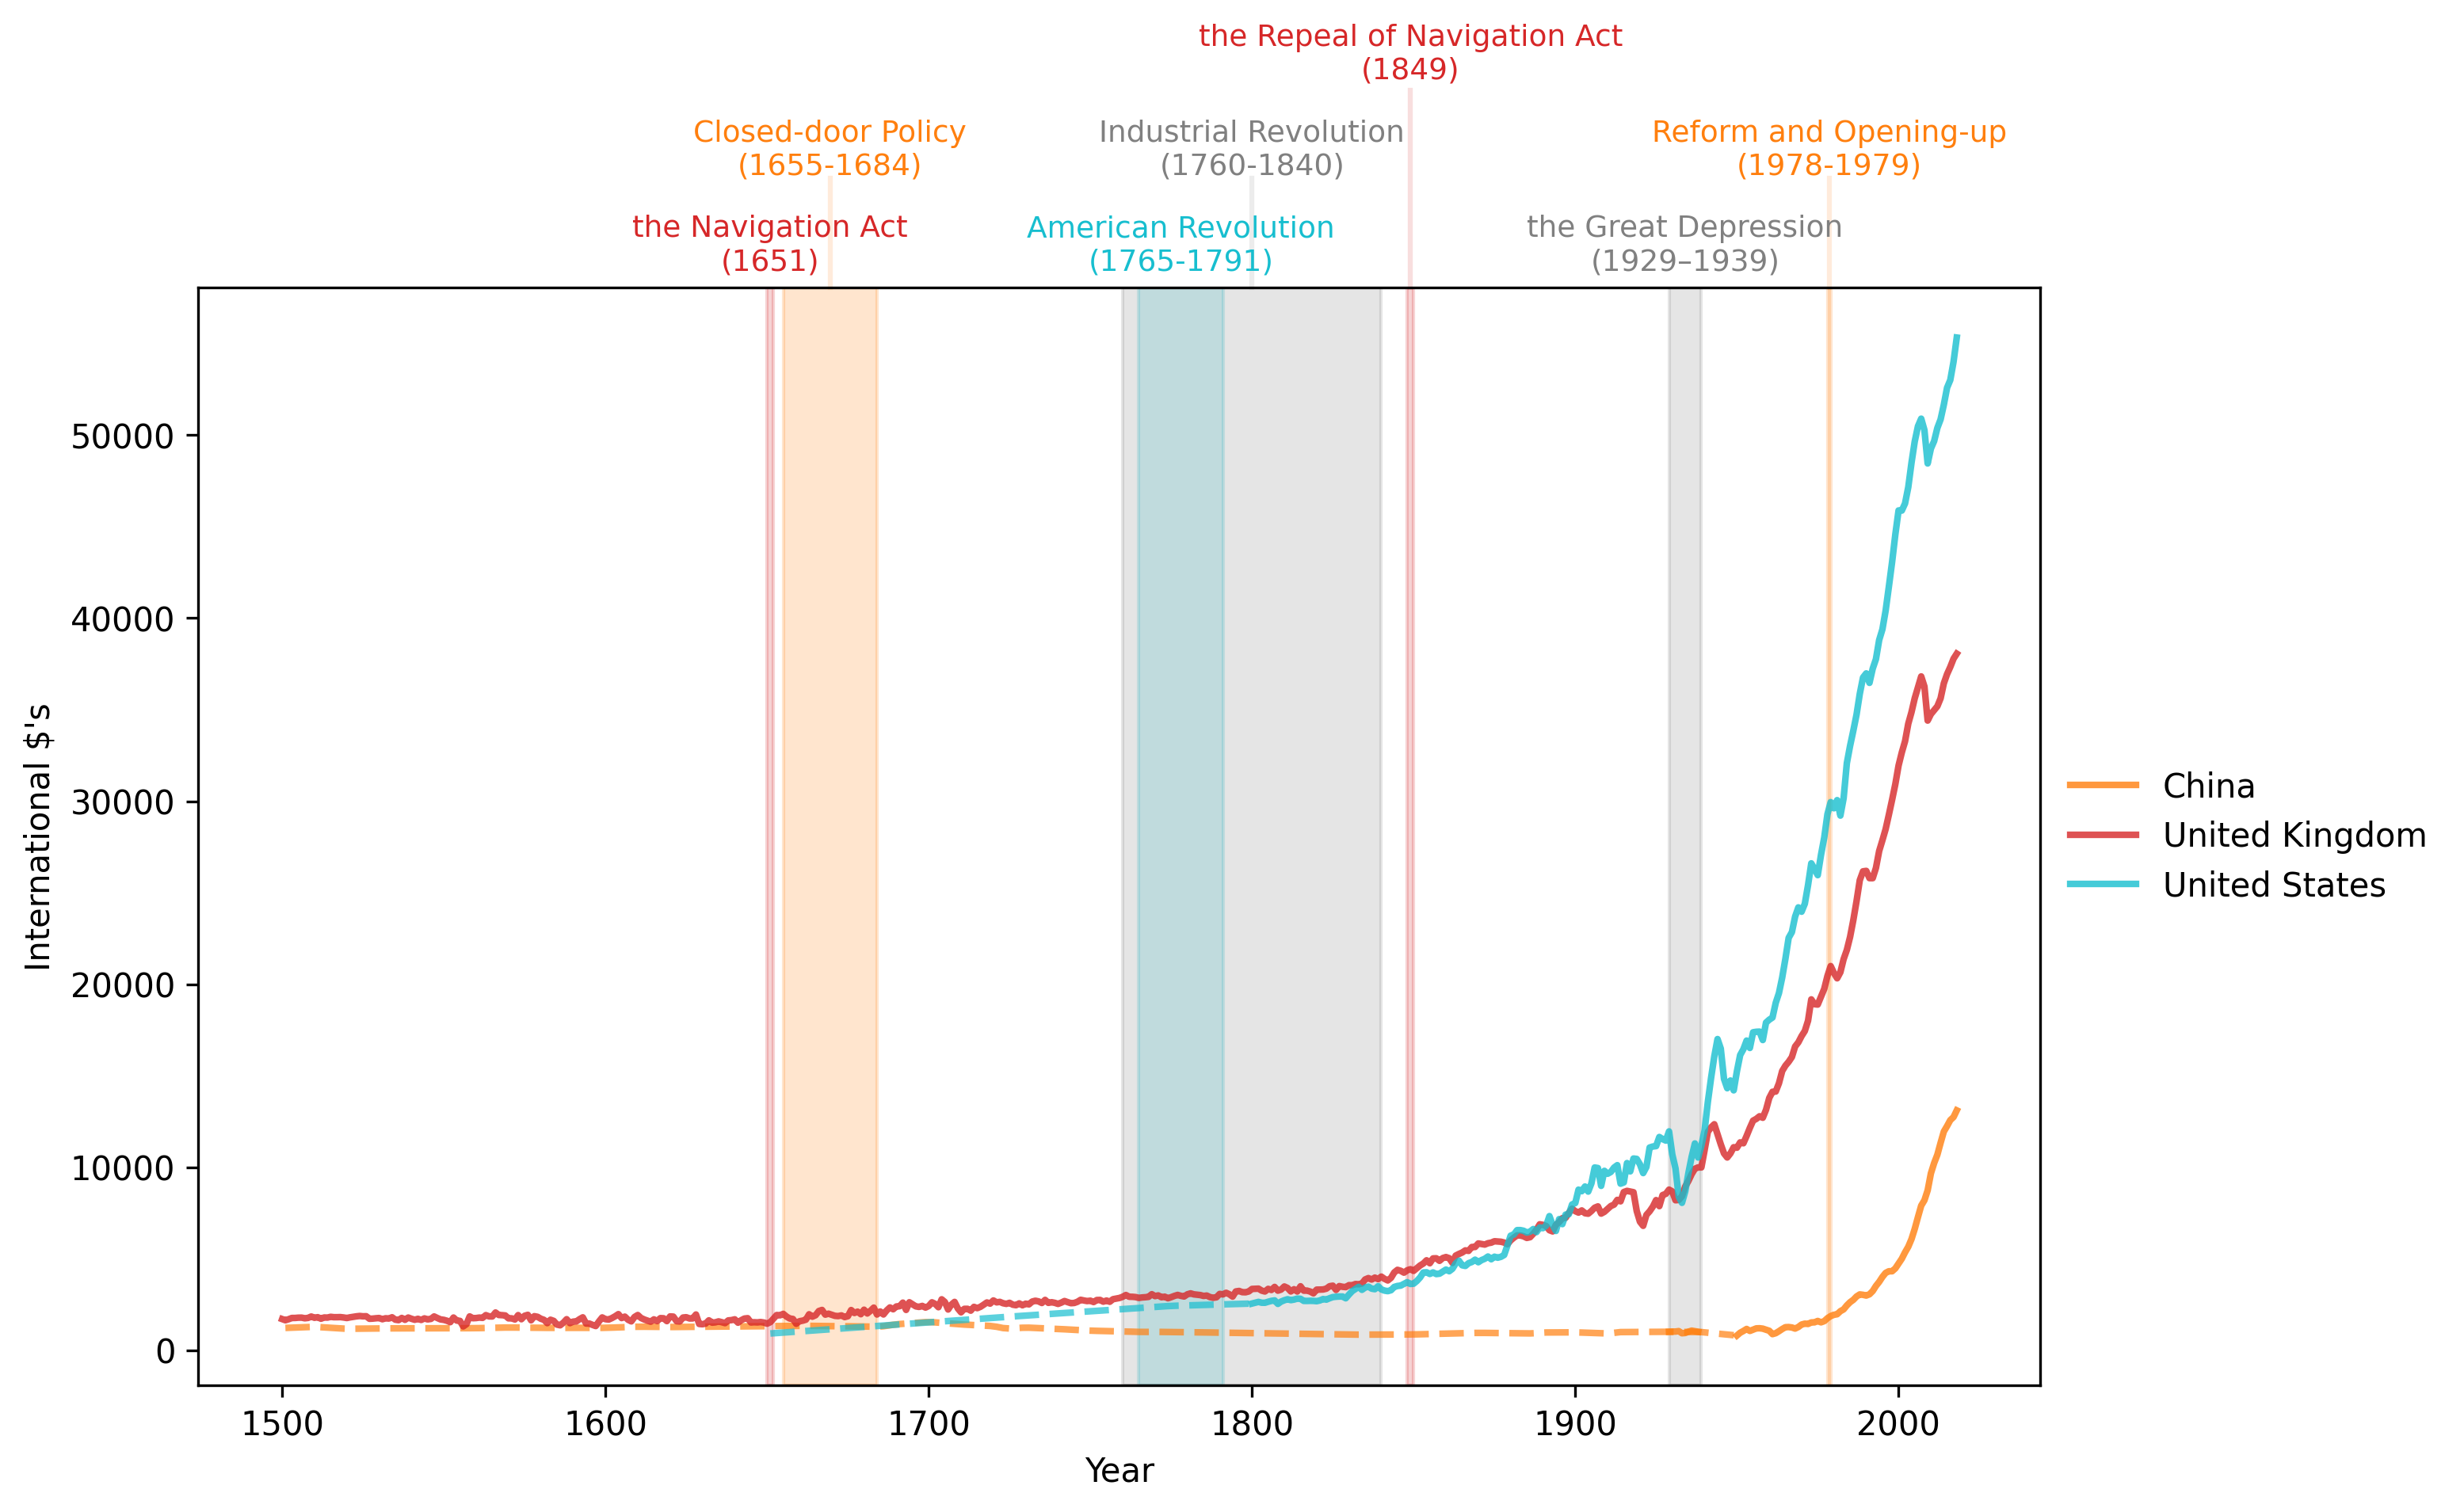

In [6]:

## allows us to make really nice plots: US, GBR, CHN

# we want to highlight events: define a namedtuple for it
Event = namedtuple("Event", ["year_range", "y_text", "text", "color", "ymax"])

fig, ax = plt.subplots(dpi=300, figsize = (10, 6))

cntry = ["CHN", "GBR", "USA"]
ax = draw_interp_plots(gdppc[cntry].loc[1500:], # plot from 1500 onwards - year is index 
                       "International $'s", "Year",
                       color_mapping, code_to_name, 2, False, ax)


# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

# draw events 
def draw_events(events, ax):
    # iterate over events
    for event in events:
        event_mid = sum(event.year_range) / 2 # evetn midpoint
        ax.text(event_mid,
                event.y_text,
                event.text,
                color = event.color,
                **t_params) # unpack dictionary - pass k-v pairs as keyword arguments
        ax.axvspan(*event.year_range, # unpack tuple into separate arguments
                   color = event.color,
                   alpha = 0.2)
        ax.axvline(event_mid, ymin = 1,
                   ymax = event.ymax, color = event.color,
                   linestyle = "-", clip_on = False, alpha = 0.15)

# draw events
draw_events(events, ax) 
plt.show()

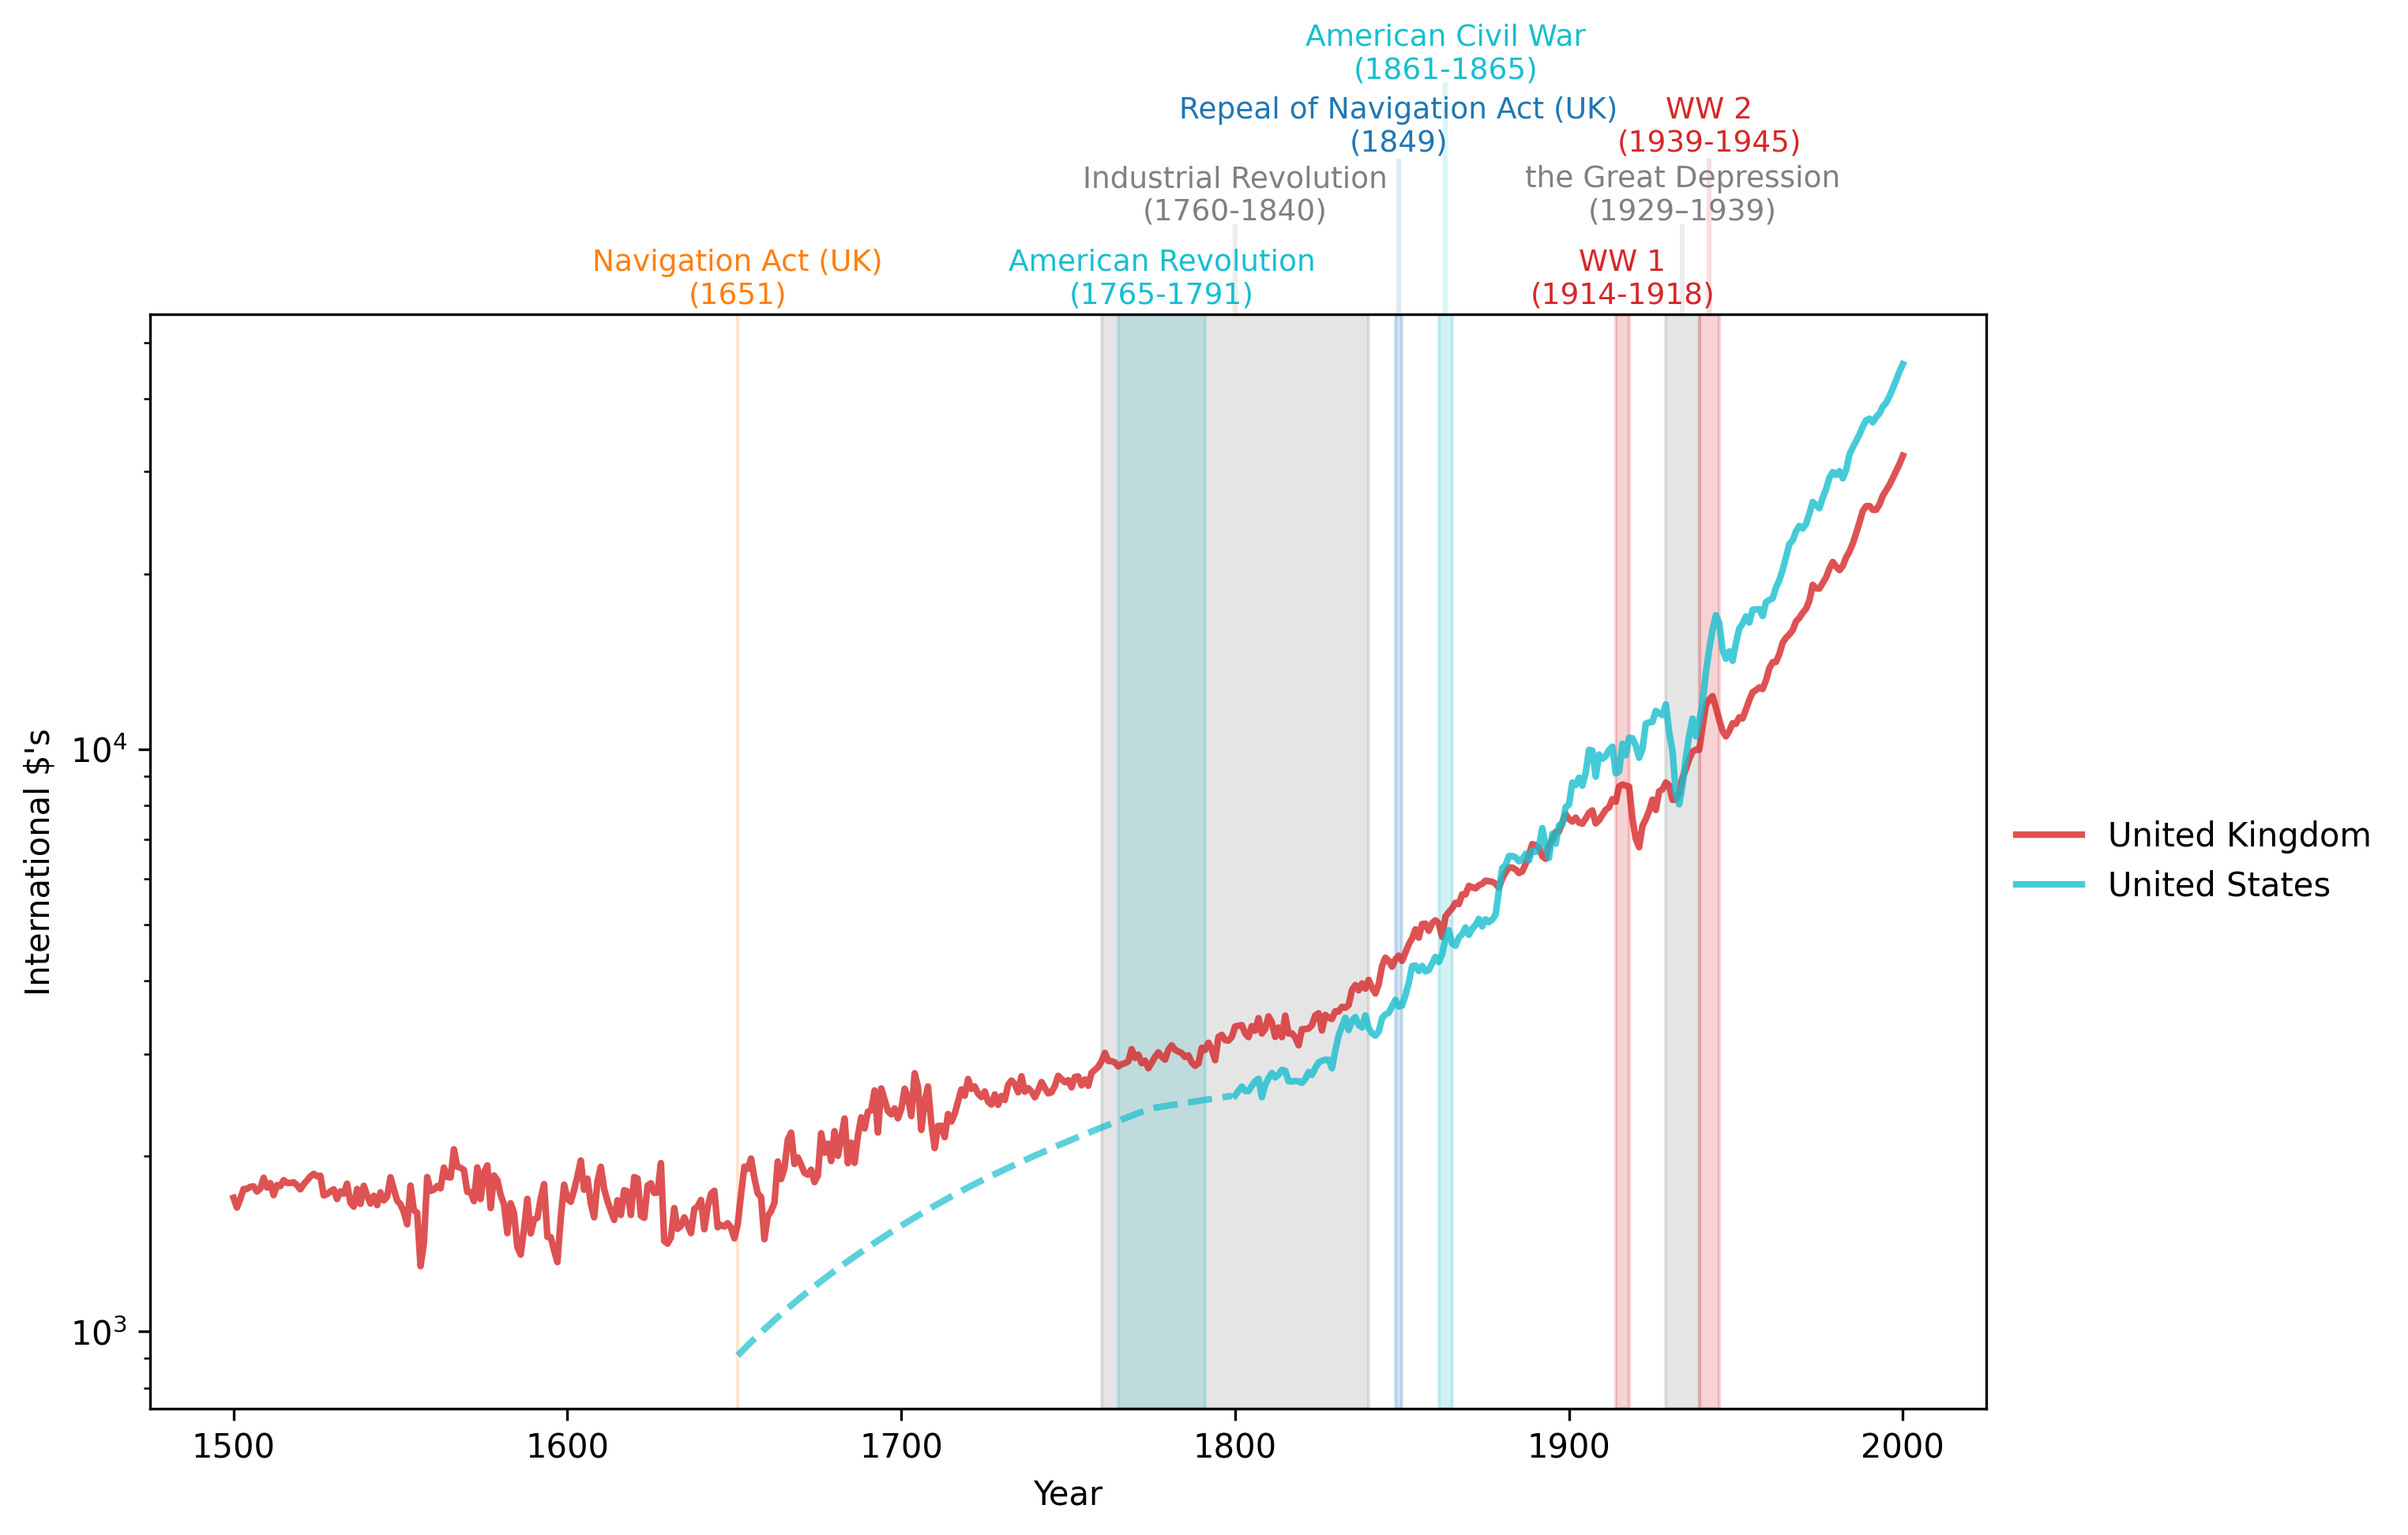

In [7]:
# focus on USA and GBR in more detail:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

cntry = ['GBR', 'USA']
ax = draw_interp_plots(gdppc[cntry].loc[1500:2000],
    'International $\'s','Year',
    color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points=
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()

In [8]:
# look at industrialized world
# focus on GDP as a proxy for geo-political military power 

data.set_index(["countrycode", "year"], inplace=True)
# add col of gdp 
data["gdp"] = data["gdppc"] * data["pop"]
data

country      gdppc          pop           gdp
countrycode year                                                   
AFG         1820  Afghanistan        NaN   3280.00000           NaN
            1870  Afghanistan        NaN   4207.00000           NaN
            1913  Afghanistan        NaN   5730.00000           NaN
            1950  Afghanistan  1156.0000   8150.00000  9.421400e+06
            1951  Afghanistan  1170.0000   8284.00000  9.692280e+06
...                       ...        ...          ...           ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205  2.122250e+07
            2015     Zimbabwe  1560.0000  13479.13812  2.102746e+07
            2016     Zimbabwe  1534.0000  13664.79457  2.096179e+07
            2017     Zimbabwe  1582.3662  13870.26413  2.194784e+07
            2018     Zimbabwe  1611.4052  14096.61179  2.271535e+07

[21682 rows x 4 columns]

In [9]:
gdp = data["gdp"].unstack("countrycode") # pivot GDP to year as rows but countrycode as columns
gdp

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,6.434611e+07,1.701933e+08,2.967564e+07,6.681600e+08,8.259815e+08,2.850714e+07,1.117472e+09,3.553646e+08,1.622161e+08,7.764240e+06,...,6.437485e+07,1.648266e+10,2.628246e+08,5.983983e+08,5.098025e+08,1.110009e+08,3.210041e+08,6.484552e+08,5.341918e+07,2.122250e+07
2015,6.278339e+07,1.768487e+08,3.044453e+07,6.915385e+08,8.478549e+08,2.936531e+07,1.145387e+09,3.589881e+08,1.639971e+08,7.340438e+06,...,6.483013e+07,1.690258e+10,2.838214e+08,5.589242e+08,5.439312e+08,7.990404e+07,3.275954e+08,6.568503e+08,5.498018e+07,2.102746e+07
2016,6.429743e+07,1.783339e+08,3.148182e+07,7.094261e+08,8.283730e+08,2.942693e+07,1.176481e+09,3.642183e+08,1.578124e+08,7.129465e+06,...,6.576380e+07,1.716256e+10,3.059634e+08,4.564771e+08,5.776835e+08,7.218882e+07,3.363309e+08,6.586943e+08,5.661833e+07,2.096179e+07


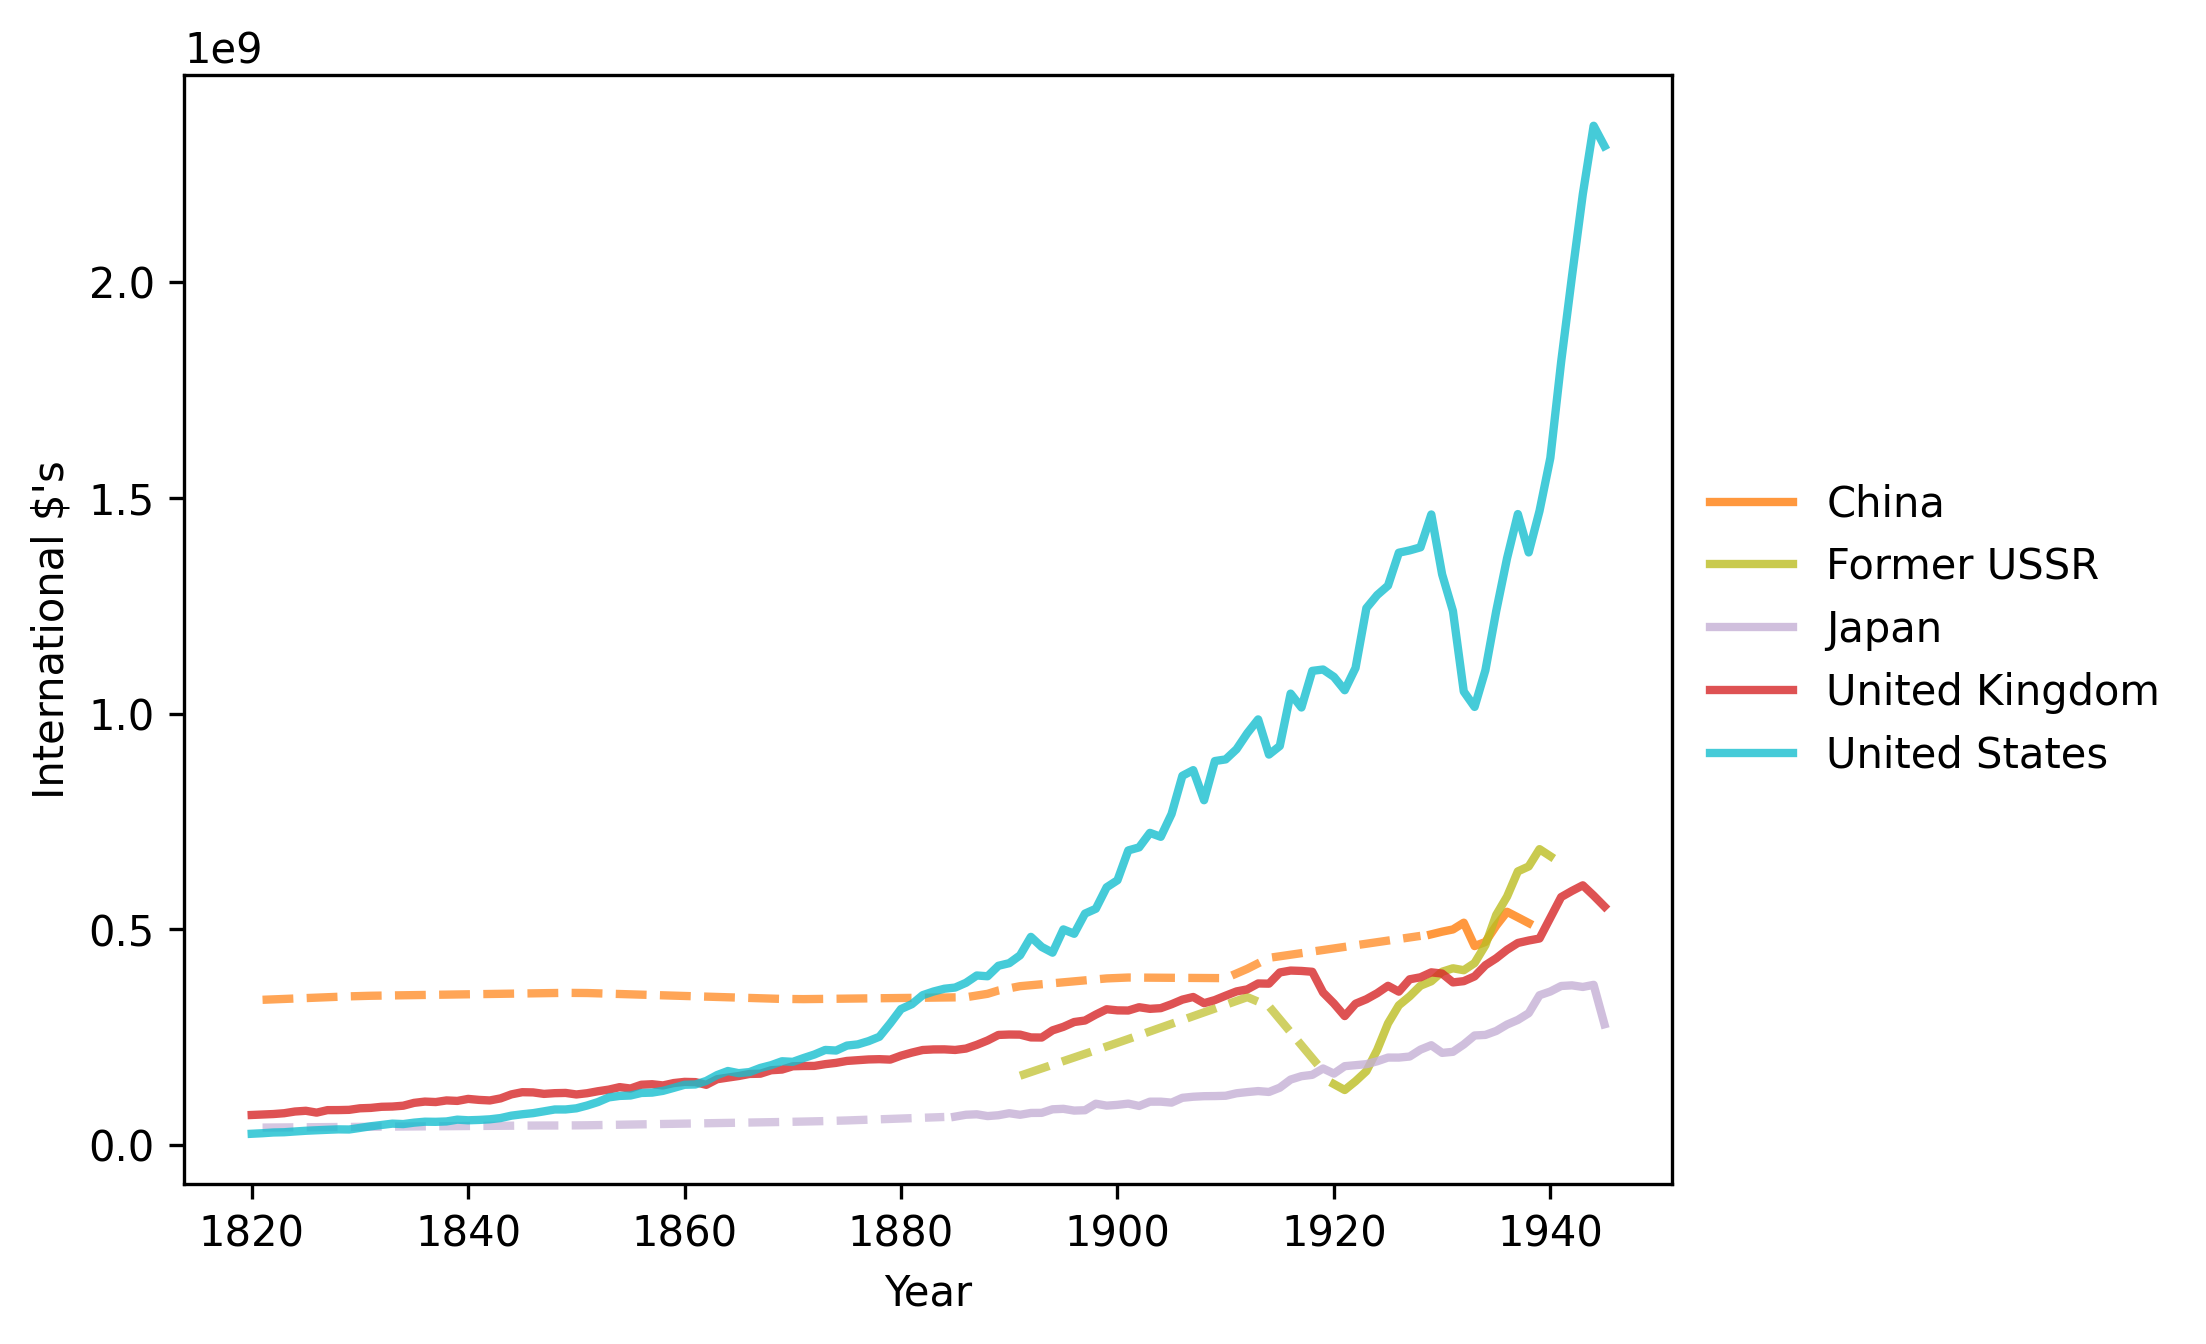

In [10]:
# visualize b/w 1820 - 1945
fig, ax = plt.subplots(dpi=300)
ax = fig.gca() # get current axes

cntry = ["CHN", "SUN", "JPN", "GBR", "USA"]
start_year, end_year = (1820, 1945)
ax = draw_interp_plots(gdp[cntry].loc[start_year:end_year],
    'International $\'s','Year',
    color_mapping, code_to_name, 2, False, ax)

In [11]:
# we want to plot data from the British Empire (BEM)

# get all countries in the British Empire
BEM = ["GBR", "IND", "AUS", "NZL", "CAN", "ZAF"]

# create a new col with their gdp 
gdp["BEM"] = gdp[BEM].loc[start_year - 1:end_year].interpolate(method='index').sum(axis=1) # row-wise sum

In [12]:
color_mapping['BEM'] = color_mapping['GBR']  # Set the color to be the same as Great Britain

# Add British Empire to code_to_name
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

code_to_name

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina
...,...
YUG,Former Yugoslavia
ZAF,South Africa
ZMB,Zambia


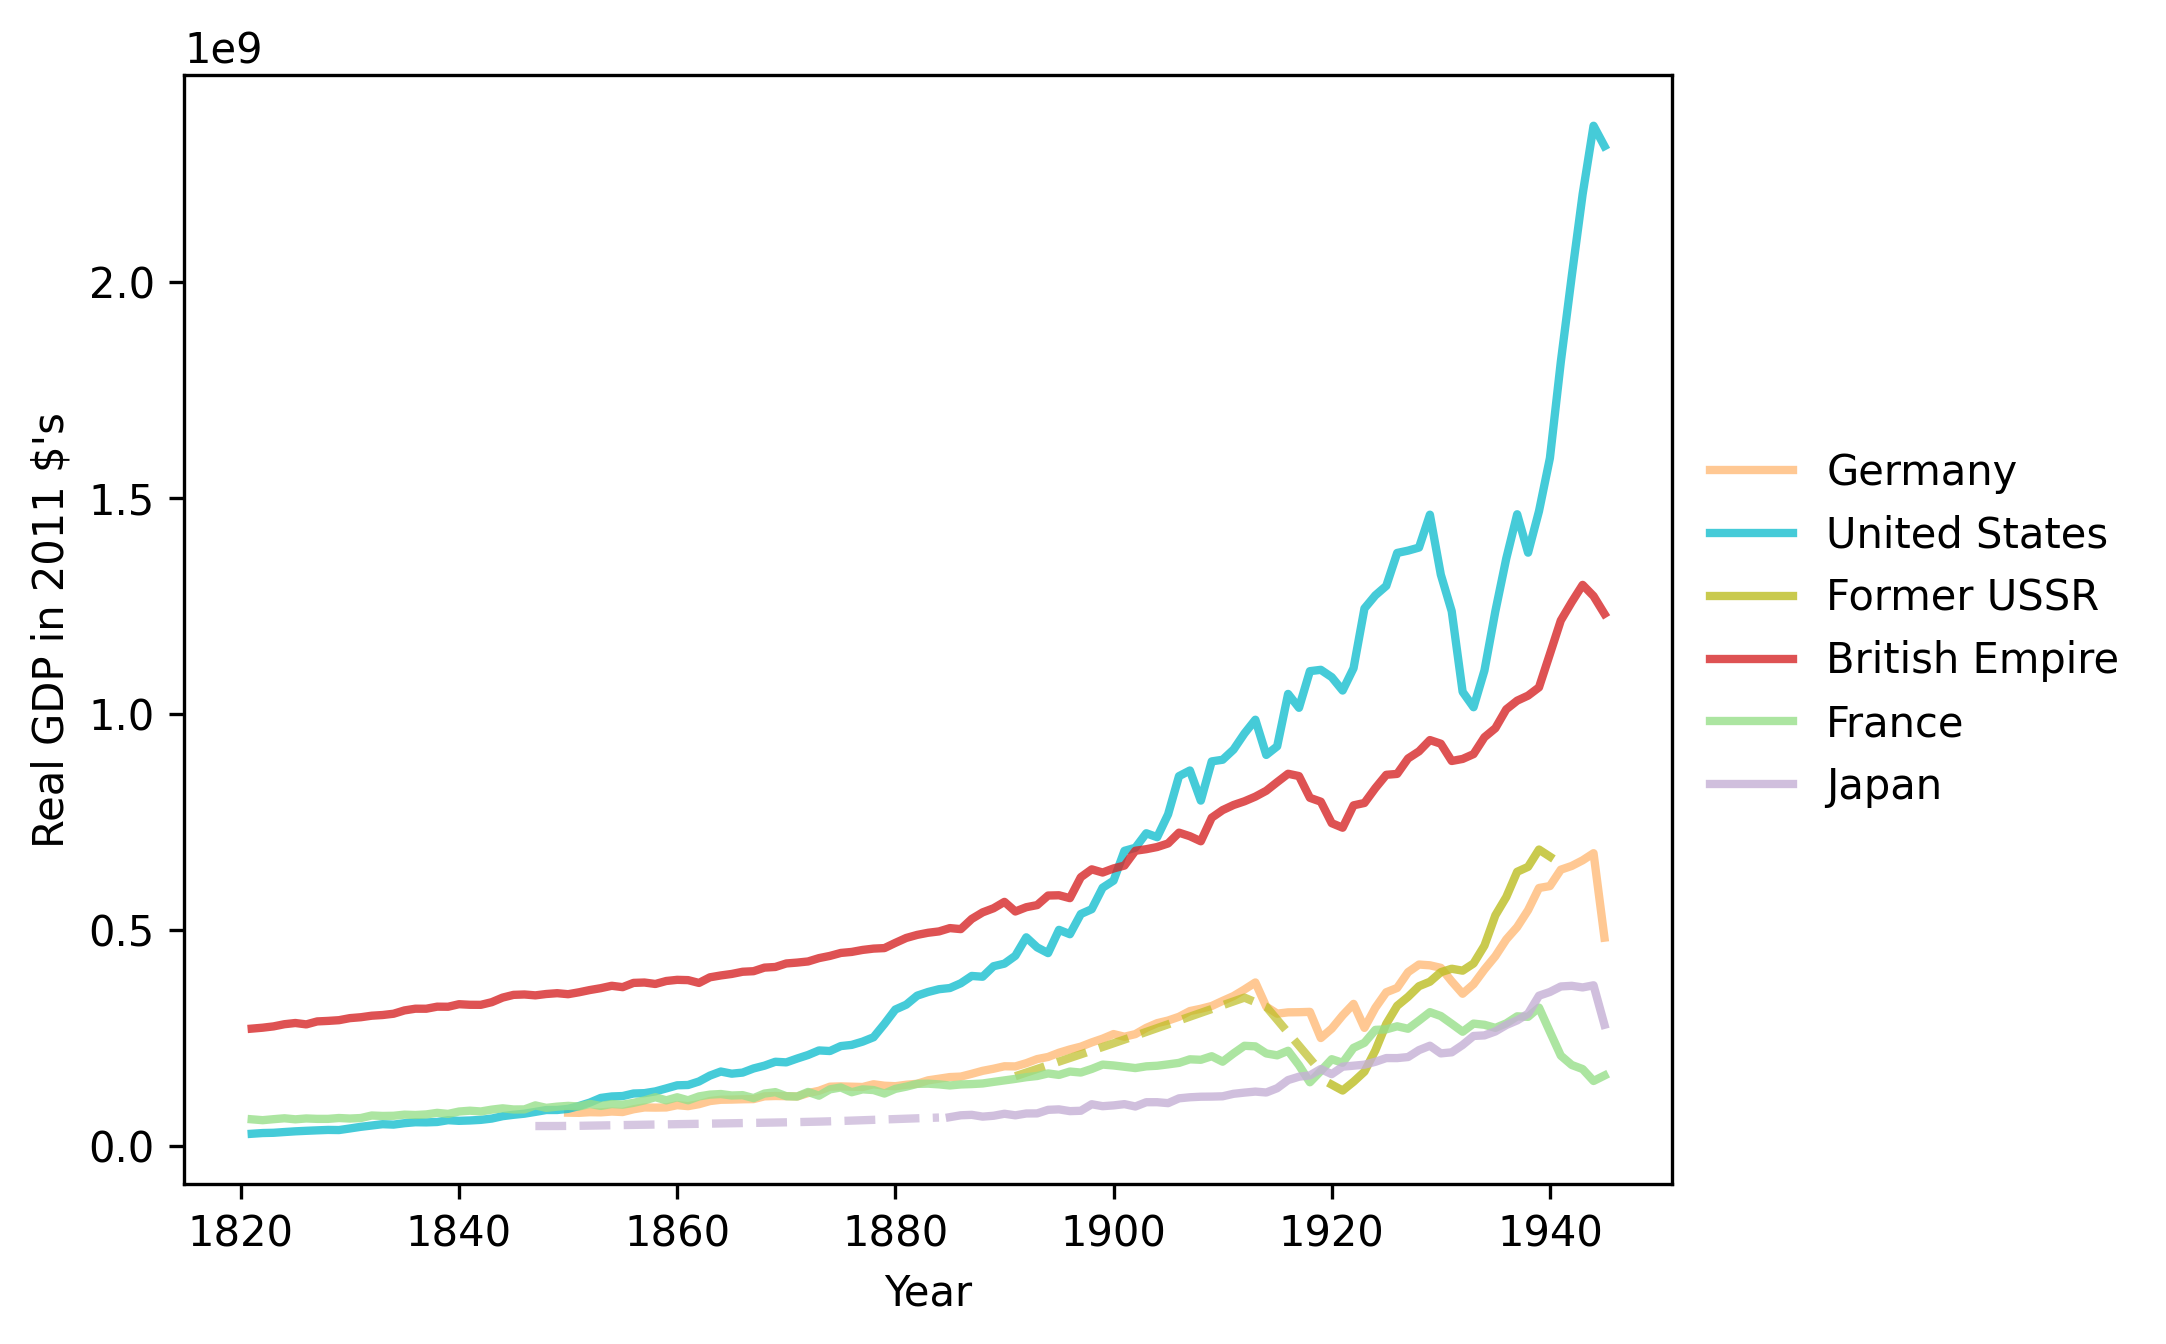

In [13]:
fig, ax = plt.subplots(dpi=300)
ax = fig.gca()
cntry = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
ax = draw_interp_plots(gdp[cntry].loc[start_year:end_year],
    'Real GDP in 2011 $\'s','Year',
    color_mapping, code_to_name, 2, False, ax)
plt.show()

## BUSINESS CYCLES


In [15]:
%%capture
!pip install wbgapi
!pip install pandas-datareader

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
import wbgapi as wb
import pandas_datareader.data as web

In [49]:
## assist with plots: set graphical parameters
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'], 
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f']) # create a cycler for each line we plot
plt.rc('axes', prop_cycle=cycler) # set this as the default for all future plots

In [18]:
# query GDP data from World Bank
wb.series.info(q = "GDP growth") # gives us info on the series we want to query

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


In [23]:
# use this one 
gdp_growth = wb.data.DataFrame("NY.GDP.MKTP.KD.ZG", 
                               ["USA", "ARG", "GBR", "GRC", "JPN"],
                               labels= True)

gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.278604,2.142487,1.028625
GRC,Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.884342,-9.004044,8.434426,5.913708
GBR,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.597471,4.101621
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.943235,10.398249,5.243044
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.061593


In [20]:
# to get info: inspect metadata
wb.series.metadata.get("NY.GDP.MKTP.KD.ZG")

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

In [24]:
# lets clean the data 
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.278604,2.142487,1.028625
Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,11.563667,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.884342,-9.004044,8.434426,5.913708
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.597471,4.101621
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.943235,10.398249,5.243044
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.061593


In [36]:
# write a function to generate plots for individual countries (taking into account recessions)

def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    
    """
    Plots a time series with the regressions highlighted
    
    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], **g_params, label = country) # g_params dictionary is unpacked

    # highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)

    # set options
    if ylim != None:
        ax.set_ylim(-ylim, ylim)
    else:
        ylim = ax.get_ylim()[1]

    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)


     # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    

    return ax 






# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

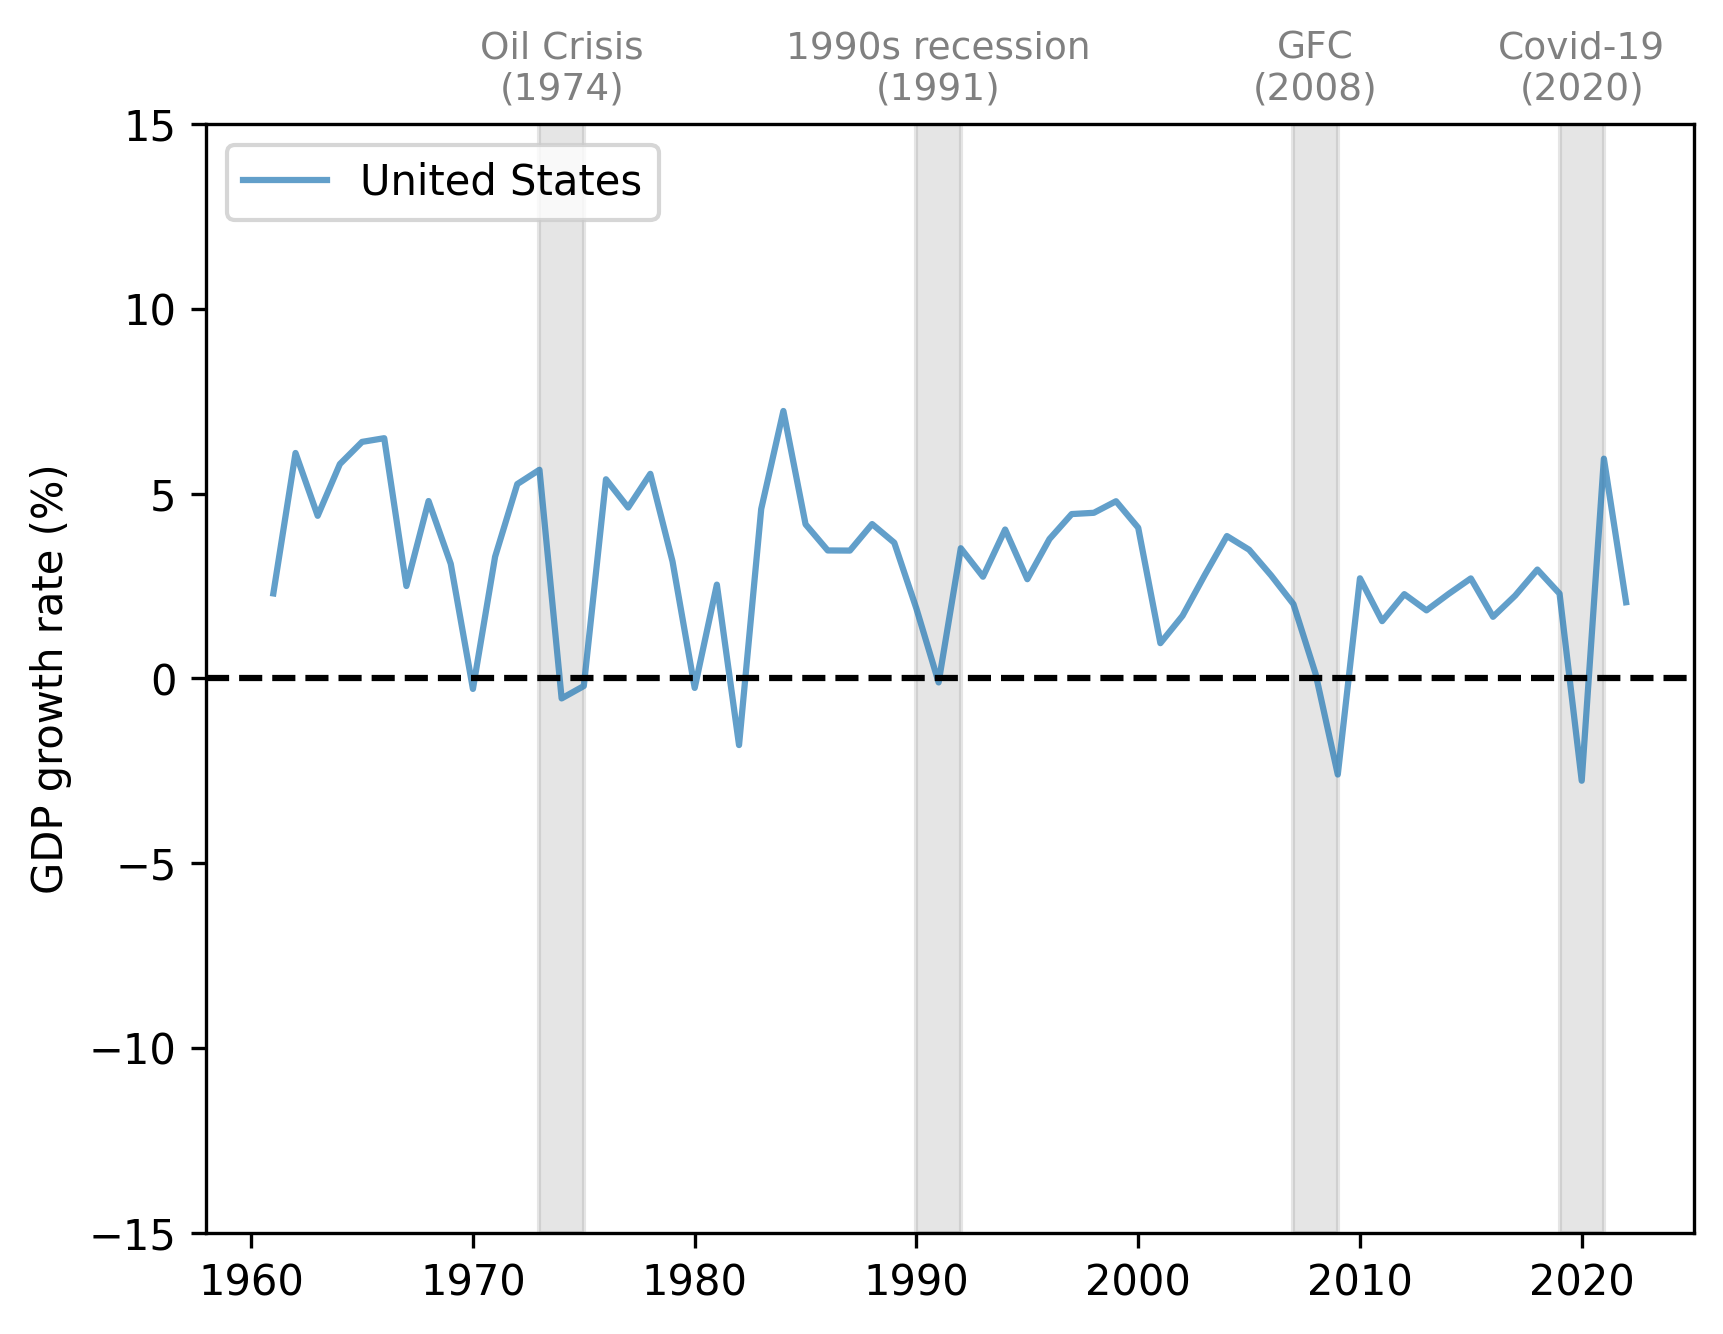

In [37]:
# start with the U.S
fig, ax = plt.subplots(dpi=300)

country = "United States"
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

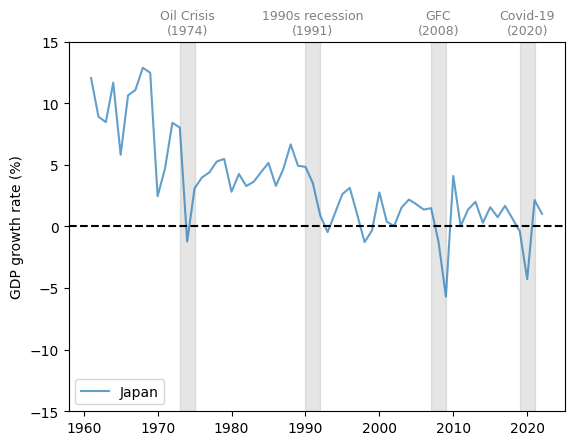

In [38]:
# now consider JPN
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()


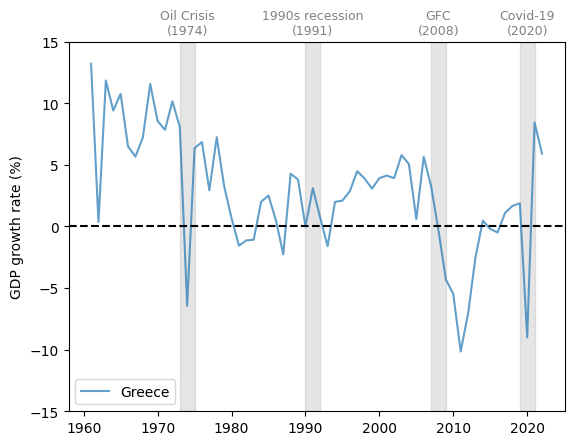

In [39]:
# Greece
fig, ax = plt.subplots()

country = 'Greece'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()


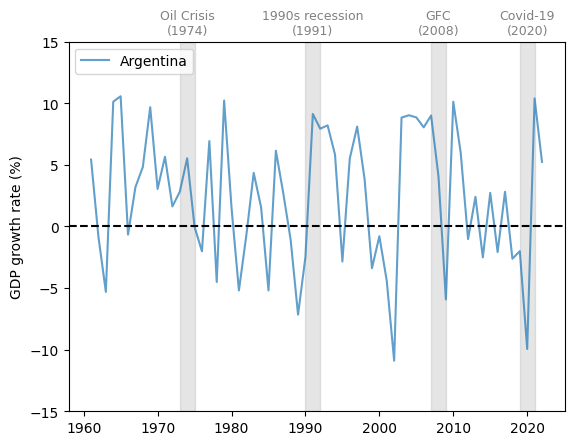

In [40]:
# Argentina
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

### Unemployment
- Look at Unemployment using FRED data from 1929-1942 and 1948-2022 combined with 1942-1948 data estimated from census

In [41]:
# set dates
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(1942, 6, 1)

unrate_history = web.DataReader('M0892AUSM156SNBR', 'fred',
                                 start_date,end_date)

unrate_history.rename(columns={'M0892AUSM156SNBR': 'UNRATE'}, 
                inplace=True)

unrate_history

,UNRATE
DATE,
1929-04-01,0.69
1929-05-01,1.65
1929-06-01,2.06
1929-07-01,0.79
1929-08-01,0.04
...,...
1942-02-01,3.56
1942-03-01,3.22
1942-04-01,2.33


In [42]:
start_date = datetime.datetime(1948, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

unrate = web.DataReader('UNRATE', 'fred', 
                    start_date, end_date)

In [43]:
# now get the census bureaus estimate for unemployment rate b/w 1942 and 1948 
years = [datetime.datetime(year, 6, 1) for year in range(1942, 1948)]
unrate_census = [4.7, 1.9, 1.2, 1.9, 3.9, 3.9]

unrate_census = {'DATE': years, 'UNRATE': unrate_census} # create dictionar of dict of it 
unrate_census = pd.DataFrame(unrate_census) # turn into dataframe
unrate_census.set_index('DATE', inplace=True)

## obtain NBER defined recession dates
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)

nber # dummy variable: 1 if in recession, 0 if not

,USREC
DATE,
1929-01-01,0
1929-02-01,0
1929-03-01,0
1929-04-01,0
1929-05-01,0
...,...
2022-08-01,0
2022-09-01,0
2022-10-01,0


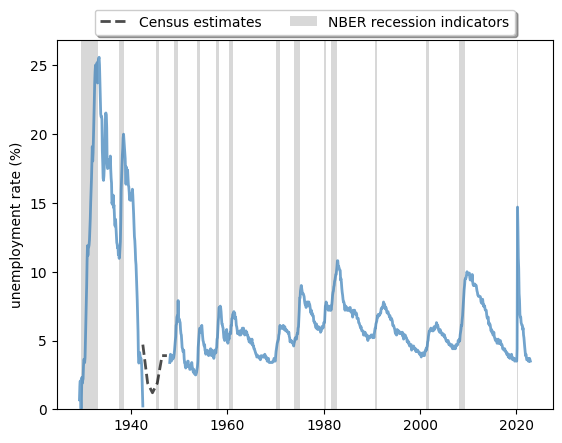

In [45]:
# make plot 
fig, ax = plt.subplots()

ax.plot(unrate_history, **g_params, 
        color='#377eb8', 
        linestyle='-', linewidth=2)
ax.plot(unrate_census, **g_params, 
        color='black', linestyle='--', 
        label='Census estimates', linewidth=2)
ax.plot(unrate, **g_params, color='#377eb8', 
        linestyle='-', linewidth=2)


# Draw gray boxes according to NBER recession indicators
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER recession indicators')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('unemployment rate (%)')

plt.show()


The plot shows that

- expansions and contractions of the labor market have been highly correlated with recessions.

- cycles are, in general, asymmetric: sharp rises in unemployment are followed by slow recoveries.

It also shows us how unique labor market conditions were in the US during the post-pandemic recovery.

The labor market recovered at an unprecedented rate after the shock in 2020-2021.

### SYNCHRONIZATION
- saw previously that developed countries tend to exhibit synchronized periods of recessions

In [46]:
# modify previous function to draw plot including multiple countries

def plot_comparison(data, countries, 
                        ylabel, txt_pos, y_lim, ax, 
                        g_params, b_params, t_params, 
                        baseline=0):
    
    
    """
    Plot multiple series on the same graph

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    countries : list
        List of countries to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the lines
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    for country in countries:
        ax.plot(data.loc[country], **g_params, label = country)

    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if y_lim != None:
        ax.set_ylim([-y_lim, y_lim])
    ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos, 
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos, 
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos, 
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos, 
            'Covid-19\n(2020)', **t_params) 
    if baseline != None:
        ax.hlines(y=baseline, xmin=ax.get_xlim()[0], 
                  xmax=ax.get_xlim()[1], color='black', 
                  linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

     
     

In [47]:
# obtain GDP growth for developed / developing countries
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['CHN', 'USA', 'DEU', 'BRA', 'ARG', 'GBR', 'JPN', 'MEX'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,NaN,5.000000,4.664415,8.106887,11.905481,7.100000,6.096139,5.854925,9.423279,3.418620,...,1.354092,2.849773,3.293152,2.630532,2.113129,2.194995,-0.199048,-7.987912,4.720565,3.062380
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.278604,2.142487,1.028625
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.597471,4.101621
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.943235,10.398249,5.243044
Brazil,NaN,8.600000,6.600000,0.600000,3.400000,2.400000,6.700000,4.200000,9.800000,9.500000,...,3.004823,0.503956,-3.545763,-3.275917,1.322869,1.783667,1.220778,-3.276759,4.988850,2.900531
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987,1.785208
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,2.061593
China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,16.940000,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.447478,2.990805


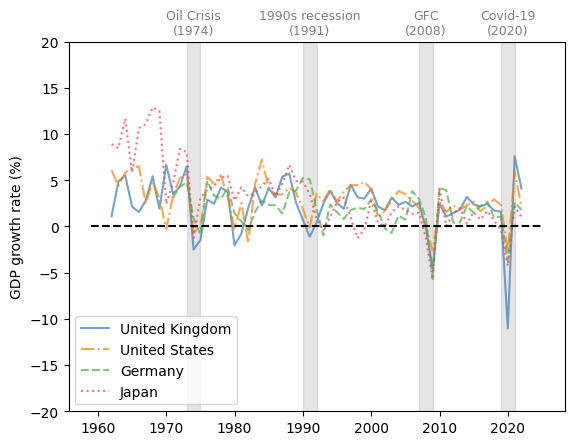

In [50]:
# show for developed countries
fig, ax = plt.subplots()
countries = ['United Kingdom', 'United States', 'Germany', 'Japan']
ylabel = 'GDP growth rate (%)'
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel,
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

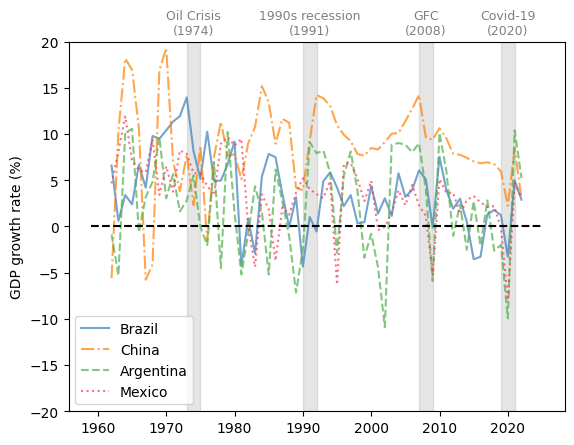

In [51]:
# show same for developing countries
fig, ax = plt.subplots()
countries = ['Brazil', 'China', 'Argentina', 'Mexico']
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel, 
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()


### LEADING INDICATORS
- Examining leading indicators and correlated factors helps policymakers to understand the causes and results of business cycles.
#### CONSUMPTION
- One widely cited indicator for consumer confidence is the consumer sentiment index published by the University of Michigan.
- Here we plot the University of Michigan Consumer Sentiment Index and year-on-year core consumer price index (CPI) change from 1978-2022 in the US.


In [53]:
# plot from 1978 - 2022
start_date = datetime.datetime(1978, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)
consumer_confidence = web.DataReader('UMCSENT', 'fred', 
                                start_date, end_date)

consumer_confidence

,UMCSENT
DATE,
1978-01-01,83.7
1978-02-01,84.3
1978-03-01,78.8
1978-04-01,81.6
1978-05-01,82.9
...,...
2022-08-01,58.2
2022-09-01,58.6
2022-10-01,59.9


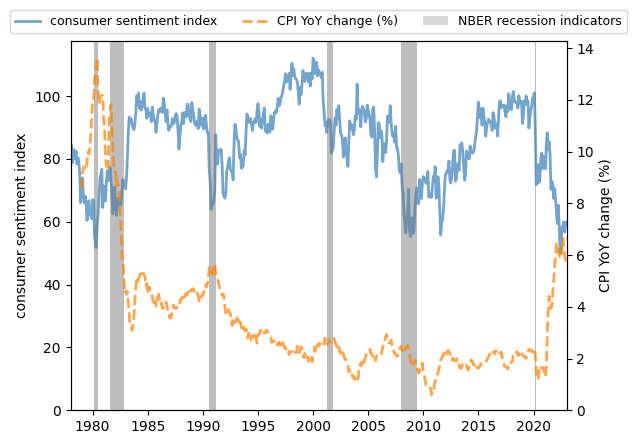

In [58]:
# with index as time - can send to plot straight away 

fig, ax = plt.subplots()
ax.plot(consumer_confidence, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2)

ax.fill_between(nber.index, 0, 1, 
            where=nber['USREC']==1, 
            color='grey', edgecolor='none',
            alpha=0.3, 
            transform=ax.get_xaxis_transform(), 
            label='NBER recession indicators')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel('consumer sentiment index')


# Plot CPI on another y-axis
ax_t = ax.twinx()
inflation = web.DataReader('CPILFESL', 'fred', 
                start_date, end_date).pct_change(12)*100

# Add CPI on the legend without drawing the line again
ax_t.plot(2020, 0, **g_params, linestyle='-', 
          linewidth=2, label='consumer sentiment index')
ax_t.plot(inflation, **g_params, 
          color='#ff7f00', linestyle='--', 
          linewidth=2, label='CPI YoY change (%)')

ax_t.fill_between(nber.index, 0, 1,
                  where=nber['USREC']==1, 
                  color='grey', edgecolor='none',
                  alpha=0.3, 
                  transform=ax.get_xaxis_transform(), 
                  label='NBER recession indicators')
ax_t.set_ylim([0, ax_t.get_ylim()[1]])
ax_t.set_xlim([start_date, end_date])
ax_t.legend(loc='upper center',
            bbox_to_anchor=(0.5, 1.1),
            ncol=3, fontsize=9)
ax_t.set_ylabel('CPI YoY change (%)')
plt.show()


#### CREDIT LEVEL
Credit contractions often occur during recessions, as lenders become more cautious and borrowers become more hesitant to take on additional debt.

- This is due to factors such as a decrease in overall economic activity and gloomy expectations for the future.
- One example is domestic credit to the private sector by banks in the UK.
- The following graph shows the domestic credit to the private sector as a percentage of GDP by banks from 1970 to 2022 in the UK.

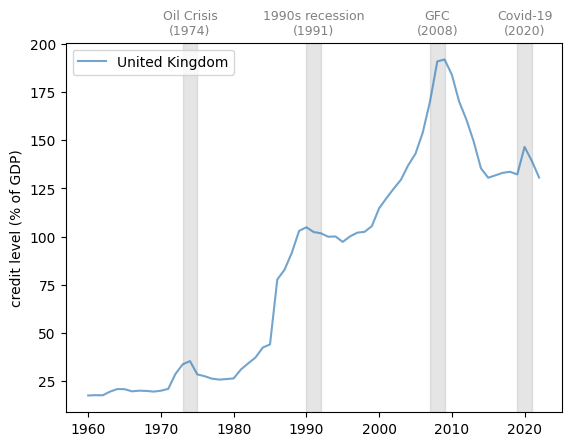

In [59]:
private_credit = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', 
                ['GBR'], labels=True)
private_credit = private_credit.set_index('Country')
private_credit.columns = private_credit.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = 'United Kingdom'
ylabel = 'credit level (% of GDP)'
ax = plot_series(private_credit, countries, 
                 ylabel, 0.05, ax, g_params, b_params, 
                 t_params, ylim=None, baseline=None)
plt.show()

## 4.0 INCOME AND WEALTH INEQUALITY

In [60]:
%%capture 
!pip install --upgrade quantecon interpolation

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd
from interpolation import interp


/opt/homebrew/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### LORENZ CURVE

- Lorenz Curve starts from sample $w_1,...,w_n$ and produces a curve $L$ (ass. data sorted from smallest to largest)
- sps $w_1$ is wealth of poorest member of population and so on
- To create $L$: generate $x_i = i / n$ and $y_i = \frac{\sum_{j \leq i} w_j}{\sum_{j \leq n} w_j}$
- The Lorenz curve $L$ is generated through these data-points through **interpolation**

We start of by constructing Lorenz curves with *simulated* data: 

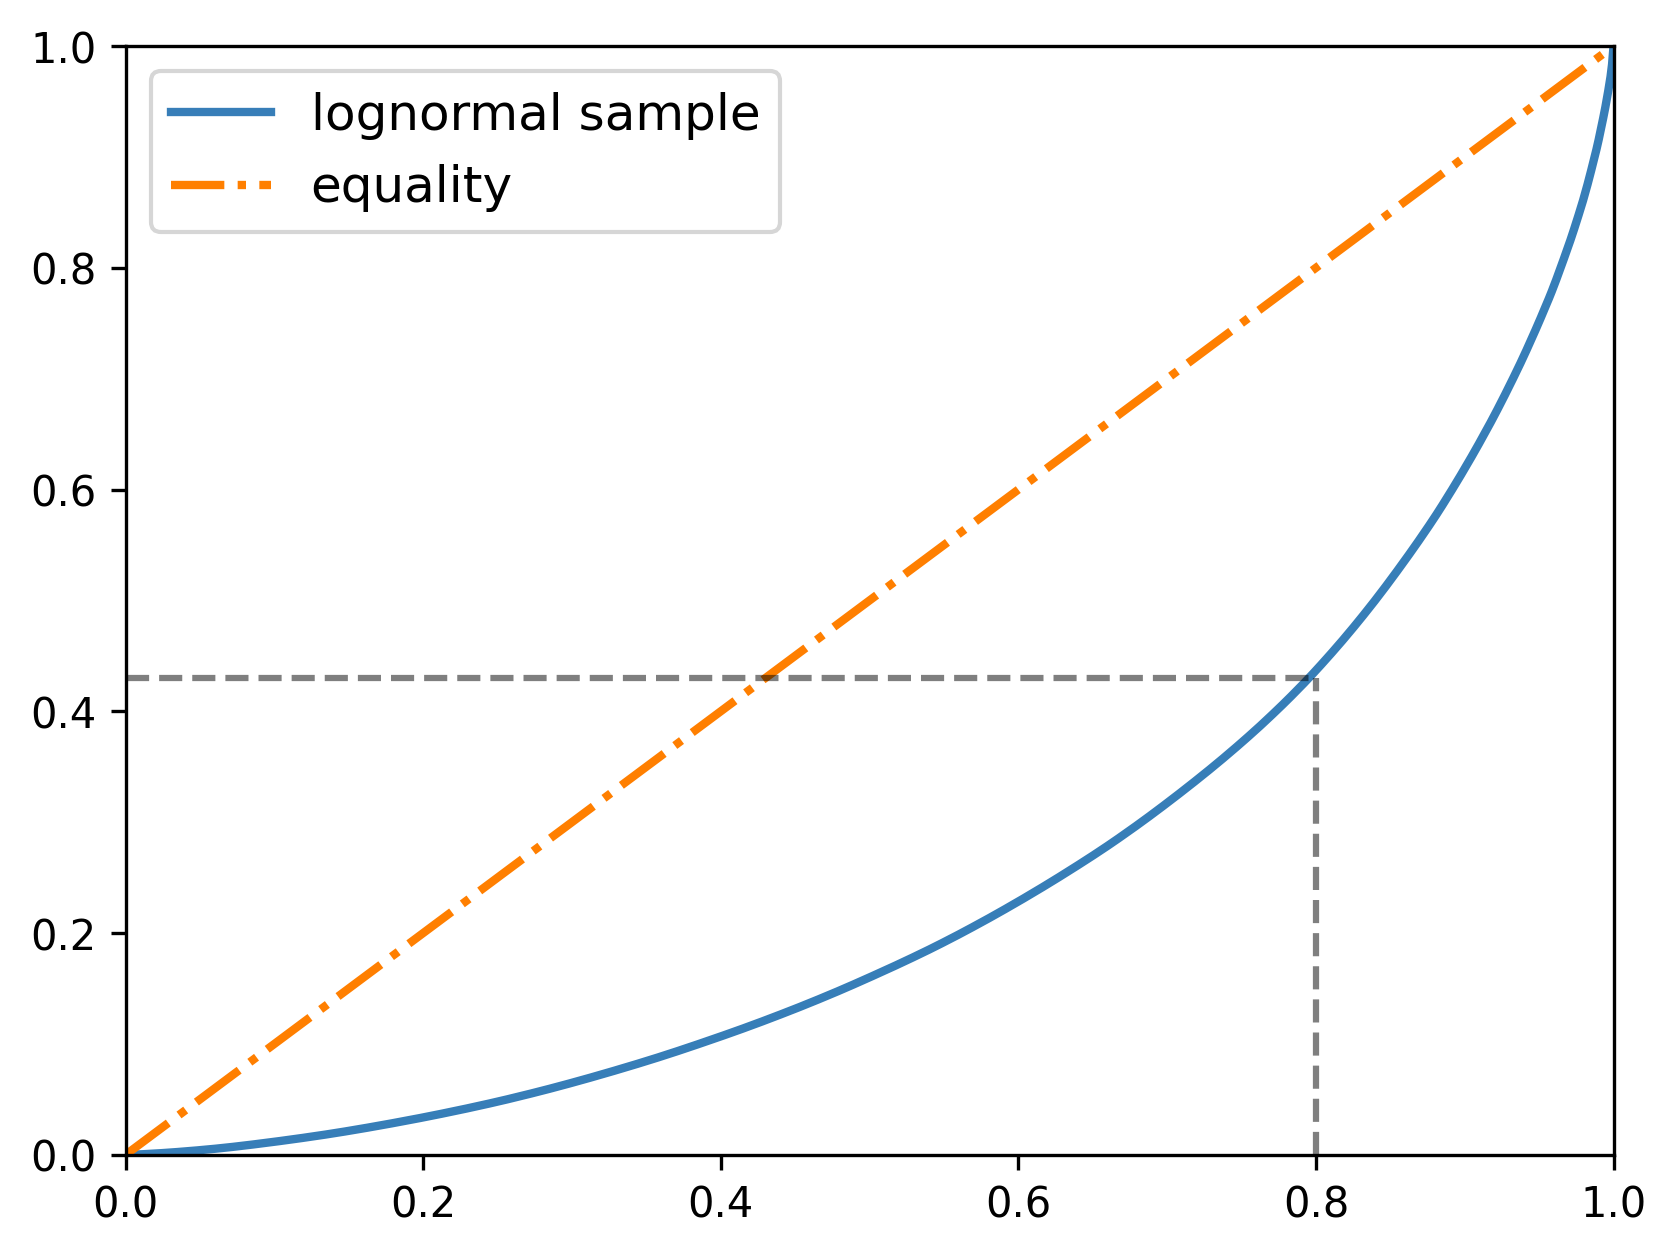

In [64]:
n = 2000
sample = np.exp(np.random.randn(n)) # lognormal distribution

fig, ax = plt.subplots(dpi=300)

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2) # to get equality line

ax.legend(fontsize=12)

# dashed line shows: 80% of hholds own: 40% of wealth
ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()



- Now look at real US data - using Survey of Consumer Finances (SCF)

In [67]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url) # read in data
df = df.dropna() # drop missing values
df_income_wealth = df

df_income_wealth.head()

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
0,1950,266933.75,55483.027,0.0,0.998732,50-90%,50-90%
1,1950,87434.46,55483.027,0.0,0.998732,50-90%,50-90%
2,1950,795034.94,55483.027,0.0,0.998732,Top 10%,50-90%
3,1950,94531.78,55483.027,0.0,0.998732,50-90%,50-90%
4,1950,166081.03,55483.027,0.0,0.998732,50-90%,50-90%


In [76]:
# the following code uses the data in the `df_income_wealth` to generate Lorenz Curve
# it is complicated because we need to adjust the data acc. to population weights 

df = df_income_wealth 

# define a varlist
varlist = ["n_wealth", # net wealth
           "t_income", # total income
           "l_income"] # labor income

# get a list of the years 
years = df.year.unique()

# create lists to store Lorenz data
F_vals, L_vals = [], []

for var in varlist:
    # create lists to store lorenz curve data 
    f_vals, l_vals = [], []

    for year in years:
        # repeat the observations according to their weights: to get full distribution
        counts = list(round(df[df["year"] == year]["weights"]))
        y = df[df["year"] == year][var].repeat(counts) # repeat the observations according to their weights: to get full distribution
        y = np.asarray(y)

        # Shuffle the sequence to improve the plot
        rd.shuffle(y)    

        # calculate and store Lorenz curve data
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals

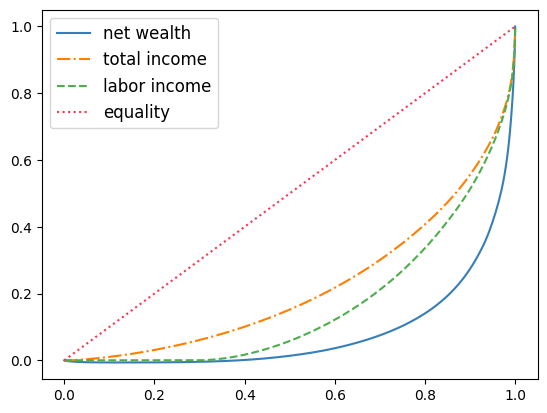

In [77]:
# Plot Lorenz curves for net wealth, total income and labor income in the US in 2016.
fig, ax = plt.subplots()

ax.plot(f_vals_nw[-1], l_vals_nw[-1], label=f'net wealth')
ax.plot(f_vals_ti[-1], l_vals_ti[-1], label=f'total income')
ax.plot(f_vals_li[-1], l_vals_li[-1], label=f'labor income')
ax.plot(f_vals_nw[-1], f_vals_nw[-1], label=f'equality')

ax.legend(fontsize=12)   
plt.show()

- Here all the income and wealth measures are pre-tax.
- Total income is the sum of households’ all income sources, including labor income but excluding capital gains.
- One key finding from this figure is that wealth inequality is significantly more extreme than income inequality.

### GINI COEFFICIENT
- Gini Coefficient is defined as:
$$ G = \frac{\sum_{i=1}^n\sum_{j=1}^n |w_j - w_i|}{2n\sum_{i=1}^n w_i} $$
- Closely related to the LC: its value is twice the area between the line of equality and the Lorenz curve 
- $G = 0$ is complete equality, while $G = 1$ is complete inequality

Examining G with simulated data:
- draw from a lognormal distribution while varying $\sigma$ between 0.2 and 4, then set $\mu = -\sigma^2 / 2$ (**mean preserving spread**)

In [79]:
k = 5 # draws 
sigmas = np.linspace(0.2, 4, k)
n = 2_000 # sample size

ginis = []

for sigma in sigmas: 
    mu = -sigma**2 / 2 
    y = np.exp(mu + sigma * np.random.randn(n))
    ginis.append(qe.gini_coefficient(y))

def plot_inequality_measures(x, y, legend, xlabel, ylabel):
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', label=legend)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    plt.show()

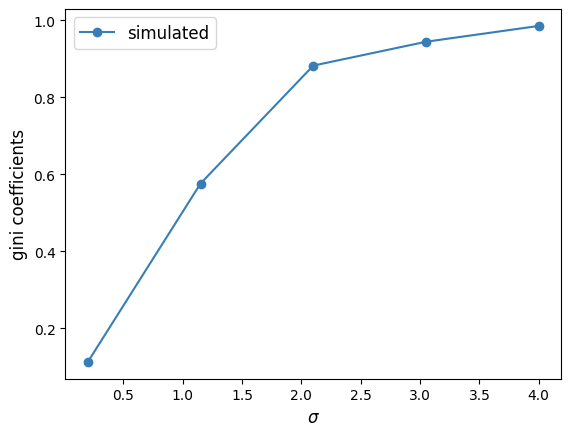

In [81]:


plot_inequality_measures(sigmas, 
                         ginis, 
                         'simulated', 
                         '$\sigma$', 
                         'gini coefficients')


In [84]:
# now lets create actual data from U.S - this code is identical to the one generating lorenz curves 

varlist = ['n_wealth',   # net wealth 
           't_income',   # total income
           'l_income']   # labor income

df = df_income_wealth

# create lists to store Gini for each inequality measure
Ginis = []

for var in varlist:
    # create lists to store Gini
    ginis = []

    for year in years:
        # repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] ))
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        rd.shuffle(y)    # shuffle the sequence
        
        # calculate and store Gini
        gini = qe.gini_coefficient(y)
        ginis.append(gini)
        
    Ginis.append(ginis)

ginis_nw, ginis_ti, ginis_li = Ginis

In [87]:
# use an average to replace an outlier in labor income gini
ginis_li_new = ginis_li
ginis_li_new[5] = (ginis_li[4] + ginis_li[6]) / 2


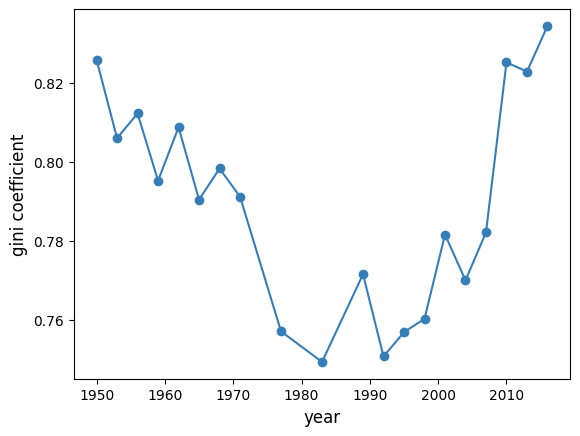

In [88]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots()

ax.plot(years, ginis_nw, marker='o')

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
    
plt.show()